In [1]:
import os
import pathlib
import matplotlib.pyplot as plt
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import os
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set_style("whitegrid")

In [2]:
folder_path = pathlib.Path("./noisy_labels/")
length_noise = defaultdict(list)

for file_path in folder_path.iterdir():
    length, level = file_path.stem.split("=")[1].split("_")
    length_noise[float(length)].append(float(level))
length_noise_list = sorted(length_noise.items(), key=lambda x: x[0])

[(20, [19600, 15300, 17700, 18500, 16900, 18900, 18300, 18700, 16300, 21500]), (30, [17900, 27900, 26700, 36900, 33400, 36800, 46900, 55500, 69400, 117100]), (40, [61900, 81000, 71600, 73500, 108100, 115900, 131500, 184900, 264800, 359100]), (50, [120100, 154600, 153200, 162100, 161700, 174800, 235900, 356200, 420900]), (60, [86700, 110100, 193900, 226900, 665800, 796300, 1624700, 1796600]), (70, [280000, 371000, 407400, 495400, 1135000, 1560700]), (80, [1287300, 1479500]), (90, [479100, 725200]), (100, [1136300])]


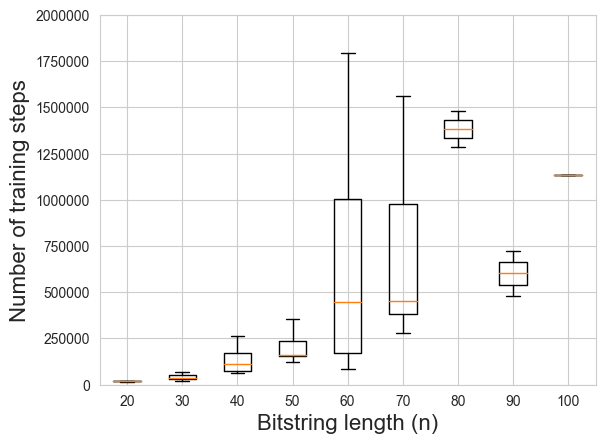

In [3]:
length_noise = defaultdict(list)

for file_path in folder_path.iterdir():
    length, level = file_path.stem.split("=")[1].split("_")
    if float(level) == 0.0:
        with file_path.open("r") as f:
            content = f.read()
            for line in content.split("\n"):
                step = line.split(":")[-1]
                if len(step) > 0:
                    length_noise[int(length)].append(int(step))
    length_noise_list = sorted(length_noise.items(), key=lambda x: x[0])
print(length_noise_list)

fig1, ax1 = plt.subplots()

plt.ylim([0, 2000000])

plt.ylabel(f'Number of training steps', fontsize=16)
plt.xlabel('Bitstring length (n)', fontsize=16)
plt.ticklabel_format(style='plain') 
# ax1.set_title('Basic Plot')
ax1.boxplot([length_noise[1] for length_noise in length_noise_list], labels=[length_noise[0] for length_noise in length_noise_list], showfliers=False)
plt.savefig('bitstring_train_steps.pdf', bbox_inches='tight', format='pdf')

No handles with labels found to put in legend.


[(20.0, [0.4, 0.05, 0.2, 0.15, 0.3, 0.1, 0.0, 0.45, 0.25, 0.35]), (30.0, [0.2, 0.3, 0.1, 0.0, 0.05, 0.15, 0.25, 0.35]), (40.0, [0.15, 0.05, 0.2, 0.3, 0.1, 0.0, 0.25]), (50.0, [0.2, 0.3, 0.15, 0.1, 0.0, 0.05, 0.35, 0.25]), (60.0, [0.25, 0.15, 0.05, 0.1, 0.0, 0.2]), (70.0, [0.15, 0.1, 0.0, 0.05]), (80.0, [0.1, 0.0, 0.15, 0.05]), (90.0, [0.1, 0.05, 0.0]), (100.0, [0.05, 0.0])]
[0.45, 0.35, 0.3, 0.35, 0.25, 0.15, 0.15, 0.1, 0.05]


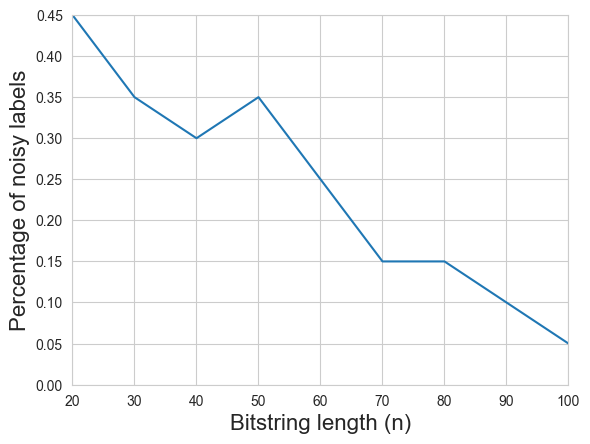

In [9]:
folder_path = pathlib.Path("./noisy_labels/")
length_noise = defaultdict(list)

for file_path in folder_path.iterdir():
    length, level = file_path.stem.split("=")[1].split("_")
    length_noise[float(length)].append(float(level))
length_noise_list = sorted(length_noise.items(), key=lambda x: x[0])
print(length_noise_list)

x = [length_noise[0] for length_noise in length_noise_list]
y = [max(length_noise[1]) for length_noise in length_noise_list]
print(y)
g = sns.lineplot(x, y, linewidth=1.5)

plt.ylim([0, 0.45])
plt.xlim([20, 100])

plt.ylabel(f'Percentage of noisy labels', fontsize=16)
plt.xlabel('Bitstring length (n)', fontsize=16)
plt.grid(True)
leg = plt.legend(loc='best', frameon=False, fontsize=14)
for line in leg.get_lines():
    line.set_linewidth(3)
    
plt.savefig('bitstring_percent_nl.pdf', bbox_inches='tight', format='pdf')
plt.show()

In [5]:
length_noise_list

[(20.0, [0.4, 0.05, 0.2, 0.15, 0.3, 0.1, 0.0, 0.45, 0.25, 0.35]),
 (30.0, [0.2, 0.3, 0.1, 0.0, 0.05, 0.15, 0.25, 0.35]),
 (40.0, [0.15, 0.05, 0.2, 0.3, 0.1, 0.0, 0.25]),
 (50.0, [0.2, 0.3, 0.15, 0.1, 0.0, 0.05, 0.35, 0.25]),
 (60.0, [0.25, 0.15, 0.05, 0.1, 0.0, 0.2]),
 (70.0, [0.15, 0.1, 0.0, 0.05]),
 (80.0, [0.1, 0.0, 0.15, 0.05]),
 (90.0, [0.1, 0.05, 0.0]),
 (100.0, [0.05, 0.0])]

No handles with labels found to put in legend.


[(20, [19600, 15300, 17700, 18500, 16900, 18900, 18300, 18700, 16300, 21500]), (30, [17900, 27900, 26700, 36900, 33400, 36800, 46900, 55500, 69400, 117100]), (40, [61900, 81000, 71600, 73500, 108100, 115900, 131500, 184900, 264800, 359100]), (50, [120100, 154600, 153200, 162100, 161700, 174800, 235900, 356200, 420900]), (60, [86700, 110100, 193900, 226900, 665800, 796300, 1624700, 1796600]), (70, [280000, 371000, 407400, 495400, 1135000, 1560700]), (80, [1287300, 1479500]), (90, [479100, 725200]), (100, [1136300])]


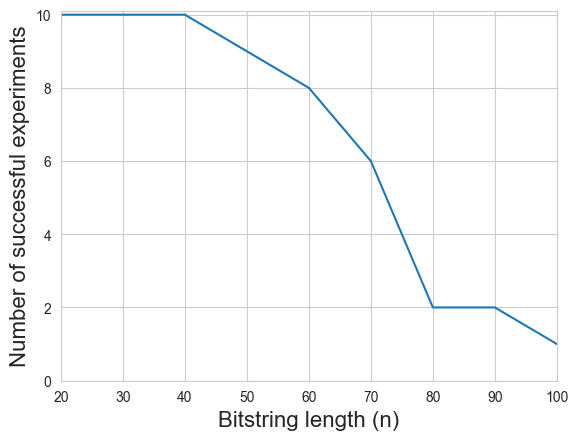

In [6]:
length_noise = defaultdict(list)

for file_path in folder_path.iterdir():
    length, level = file_path.stem.split("=")[1].split("_")
    if float(level) == 0.0:
        with file_path.open("r") as f:
            content = f.read()
            for line in content.split("\n"):
                step = line.split(":")[-1]
                if len(step) > 0:
                    length_noise[int(length)].append(int(step))
    length_noise_list = sorted(length_noise.items(), key=lambda x: x[0])
print(length_noise_list)


x = [length_noise[0] for length_noise in length_noise_list]
y = [len(length_noise[1]) for length_noise in length_noise_list]
g = sns.lineplot(x, y, linewidth=1.5)

plt.xlim([20, 100])
plt.ylim([0, 10.1])

plt.ylabel(f'Number of successful experiments', fontsize=16)
plt.xlabel('Bitstring length (n)', fontsize=16)
plt.grid(True)
leg = plt.legend(loc='best', frameon=False, fontsize=14)
for line in leg.get_lines():
    line.set_linewidth(3)
    
plt.savefig('bistring_successful_seeds.pdf', bbox_inches='tight', format='pdf')
plt.show()

In [7]:
# x = [length_noise[0] for length_noise in length_noise_list]
# y = [sum(length_noise[1])/len(length_noise[1]) for length_noise in length_noise_list]
# g = sns.lineplot(x, y, linewidth=1.5)

# plt.xlim([19, 101])
# plt.ylim([0, 1.4e6])

# plt.ylabel(f'Training steps', fontsize=16)
# plt.xlabel('Bitstring length (n)', fontsize=16)
# plt.grid(True)
# leg = plt.legend(loc='best', frameon=False, fontsize=12)
# for line in leg.get_lines():
#     line.set_linewidth(3)
# plt.ticklabel_format(style='plain') 
# plt.savefig('percent_nl.pdf', bbox_inches='tight', format='pdf')
# plt.show()

In [8]:
[len(length_noise[1]) for length_noise in length_noise_list]

[10, 10, 10, 9, 8, 6, 2, 2, 1]